## removing outliers


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline


In [10]:
df = pd.read_csv('winequality.csv')
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [12]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

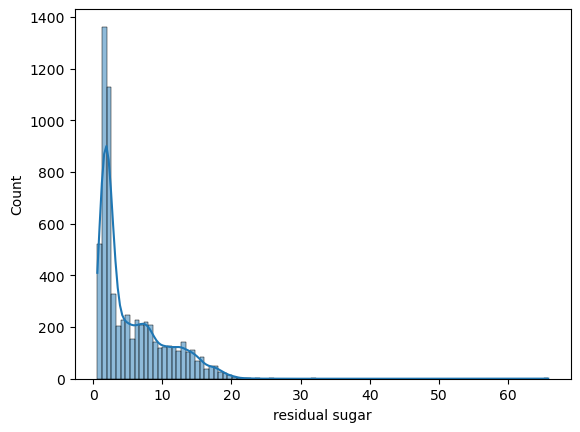

In [18]:
sns.histplot(df['residual sugar'],kde=True)
plt.show()

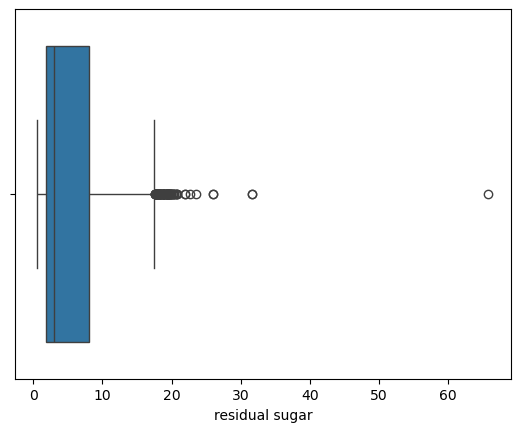

In [28]:
sns.boxplot(x=df['residual sugar'])
plt.show()

### removing using z scores

In [70]:
lower_limit = df['residual sugar'].mean() - 2*df['residual sugar'].std()
upper_limit = df['residual sugar'].mean() + 2*df['residual sugar'].std()

In [72]:
outliers=df.loc[(df['residual sugar'] > upper_limit) | (df['residual sugar'] < lower_limit)]
outliers['residual sugar'].value_counts()

residual sugar
15.40    19
17.30    14
15.60    14
15.00    13
17.80    13
         ..
18.60     1
15.15     1
17.70     1
18.90     1
18.40     1
Name: count, Length: 85, dtype: int64

# triming the outliers 

In [74]:
new_df = df.loc[(df['residual sugar'] <= upper_limit) & (df['residual sugar'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 6497
after removing outliers: 6158
outliers: 339


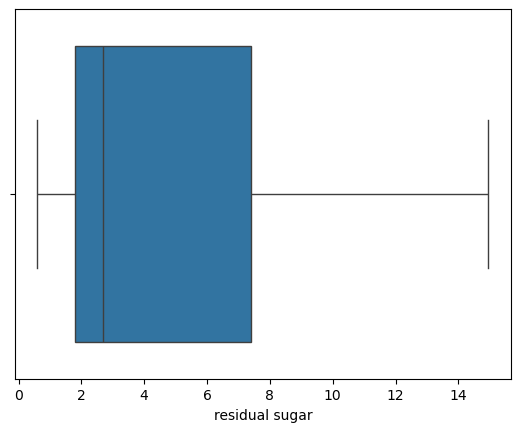

In [76]:
sns.boxplot(x=new_df['residual sugar'])
plt.show()

In [78]:
# capping - change the outlier values to upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['residual sugar']>=upper_limit), 'residual sugar'] = upper_limit
new_df.loc[(new_df['residual sugar']<=lower_limit), 'residual sugar'] = lower_limit



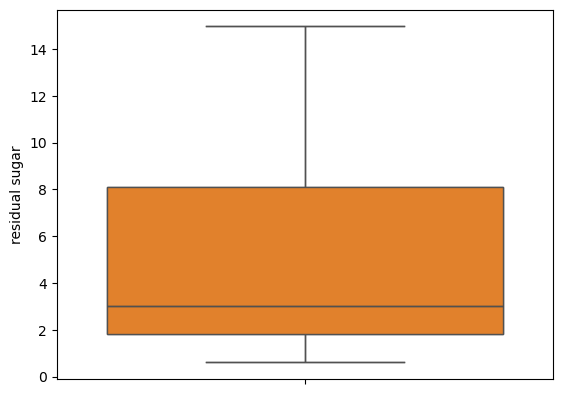

In [82]:
sns.boxplot(new_df['residual sugar'])
plt.show()

## using interquarltile range

In [165]:
q1 = df['residual sugar'].quantile(0.30)
q3 = df['residual sugar'].quantile(0.60)
iqr = q3-q1


In [167]:
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)


In [169]:
sns.boxplot(df['residual sugar'])


<Axes: ylabel='residual sugar'>

In [171]:
df.loc[(df['residual sugar'] > upper_limit) | (df['residual sugar'] < lower_limit)]

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0              0.27         0.36           20.70   
7     white            7.0              0.27         0.36           20.70   
14    white            8.3              0.42         0.62           19.25   
30    white            8.5              0.24         0.39           10.40   
34    white            5.8              0.27         0.20           14.95   
...     ...            ...               ...          ...             ...   
6332    red           10.2              0.54         0.37           15.40   
6333    red           10.2              0.54         0.37           15.40   
6372    red            9.9              0.50         0.50           13.80   
6374    red            9.9              0.50         0.50           13.80   
6472    red            5.6              0.31         0.78           13.90   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
7         0.045                 45.0                 170.0  1.00100  3.00   
14        0.040                 41.0                 172.0  1.00020  2.98   
30        0.044                 20.0                 142.0  0.99740  3.20   
34        0.044                 22.0                 179.0  0.99620  3.37   
...         ...                  ...                   ...      ...   ...   
6332      0.214                 55.0                  95.0  1.00369  3.18   
6333      0.214                 55.0                  95.0  1.00369  3.18   
6372      0.205                 48.0                  82.0  1.00242  3.16   
6374      0.205                 48.0                  82.0  1.00242  3.16   
6472      0.074                 23.0                  92.0  0.99677  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
7          0.45      8.8        6  
14         0.67      9.7        5  
30         0.53     10.0        6  
34         0.37     10.2        5  
...         ...      ...      ...  
6332       0.77      9.0        6  
6333       0.77      9.0        6  
6372       0.75      8.8        5  
6374       0.75      8.8        5  
6472       0.48     10.5        6  

[1304 rows x 13 columns]

In [173]:
# trimming - delete the outlier data
new_df = df.loc[(df['residual sugar'] <= upper_limit) & (df['residual sugar'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))


before removing outliers: 6497
after removing outliers: 5191
outliers: 1306


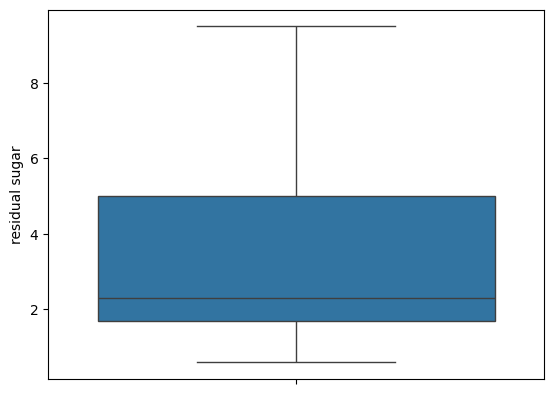

In [177]:
sns.boxplot(new_df['residual sugar'])
plt.show()

In [179]:
# capping - change the outlier values to upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['residual sugar']>upper_limit), 'residual sugar'] = upper_limit
new_df.loc[(new_df['residual sugar']<lower_limit), 'residual sugar'] = lower_limit


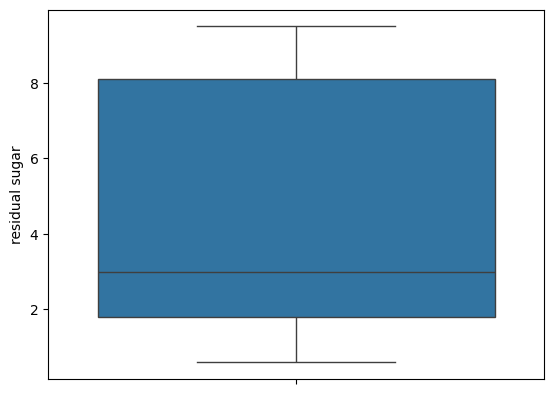

In [181]:
sns.boxplot(new_df['residual sugar'])
plt.show()

## percentile method

In [211]:
upper_limit = df['residual sugar'].quantile(0.99)
lower_limit = df['residual sugar'].quantile(0.01)
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 18.2
lower limit: 0.9


In [213]:
sns.boxplot(x=df['residual sugar'])

<Axes: xlabel='residual sugar'>

In [215]:
# find the outliers
df.loc[(df['residual sugar'] > upper_limit) | (df['residual sugar'] < lower_limit)]


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36           20.70   
7     white            7.0             0.270         0.36           20.70   
14    white            8.3             0.420         0.62           19.25   
103   white            7.5             0.305         0.40           18.90   
111   white            7.2             0.270         0.46           18.75   
...     ...            ...               ...          ...             ...   
4749  white            6.2             0.350         0.25           18.40   
4778  white            5.8             0.315         0.19           19.40   
4779  white            6.0             0.590         0.00            0.80   
4877  white            5.9             0.540         0.00            0.80   
4897  white            6.0             0.210         0.38            0.80   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
7         0.045                 45.0                 170.0  1.00100  3.00   
14        0.040                 41.0                 172.0  1.00020  2.98   
103       0.059                 44.0                 170.0  1.00000  2.99   
111       0.052                 45.0                 255.0  1.00000  3.04   
...         ...                  ...                   ...      ...   ...   
4749      0.051                 28.0                 182.0  0.99946  3.13   
4778      0.031                 28.0                 106.0  0.99704  2.97   
4779      0.037                 30.0                  95.0  0.99032  3.10   
4877      0.032                 12.0                  82.0  0.99286  3.25   
4897      0.020                 22.0                  98.0  0.98941  3.26   

      sulphates  alcohol  quality  
0          0.45     8.80        6  
7          0.45     8.80        6  
14         0.67     9.70        5  
103        0.46     9.00        5  
111        0.52     8.90        5  
...         ...      ...      ...  
4749       0.62     9.30        6  
4778       0.40    10.55        6  
4779       0.40    10.90        4  
4877       0.36     8.80        5  
4897       0.32    11.80        6  

[97 rows x 13 columns]

In [217]:
# trimming - delete the outlier data
new_df = df.loc[(df['residual sugar'] <= upper_limit) & (df['residual sugar'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))


before removing outliers: 6497
after removing outliers: 6398
outliers: 99


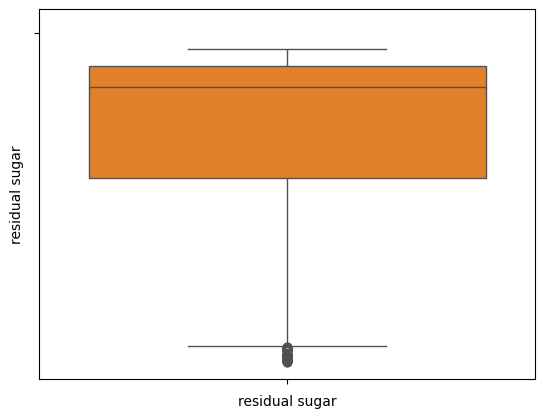

In [219]:

sns.boxplot(new_df['residual sugar'])
plt.show()


In [221]:
# capping - change the outlier values to upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['residual sugar']>upper_limit), 'residual sugar'] = upper_limit
new_df.loc[(new_df['residual sugar']<lower_limit), 'residual sugar'] = lower_limit


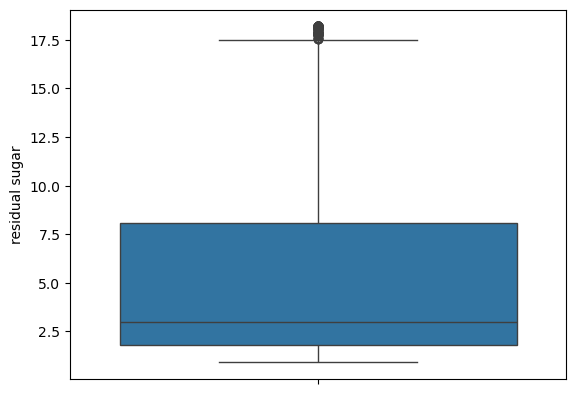

In [223]:

sns.boxplot(new_df['residual sugar'])
plt.show()

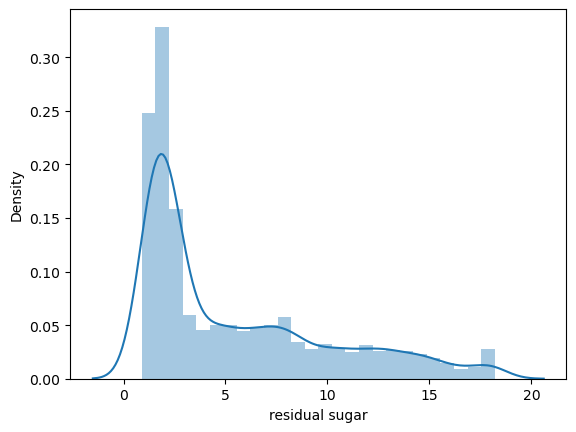

In [229]:
sns.distplot(new_df['residual sugar'])
plt.show()